
#**House Rent Analysis**


# Context

In India, the housing landscape spans from opulent palaces once owned by royalty to contemporary apartment complexes in major cities, as well as modest huts in remote villages. The country's housing sector has witnessed significant expansion, driven by increasing incomes. According to the Human Rights Measurement Initiative, India has achieved 60.9% of what is theoretically attainable for ensuring the right to housing, given its income level.

Renting, also referred to as hiring or letting, involves an arrangement where a payment is made to temporarily utilize a product, service, or property owned by someone else. A gross lease, for instance, is when the tenant pays a fixed rental fee, and the landlord is responsible for covering all regular property-related expenses. Renting serves as an example of the sharing economy.

# Content

This dataset provides details on over 4,700 houses, apartments, and flats available for rent. It includes a range of parameters such as the number of bedrooms (BHK), the rental cost, the property size, the number of floors, the type of area, the locality, the city, the furnishing status, the preferred tenant type, the number of bathrooms, and the contact information.



# Dataset Guide

- **BHK:** Number of Bedrooms, Hall, Kitchen.
- **Rent:** Price of the Houses/Apartments/Flats.
- **Size:** Size of the Houses/Apartments/Flats in Square Feet.
- **Floor:** Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
- **Area Type:** Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
- **Area Locality:** Locality of the Houses/Apartments/Flats.
- **City:** City where the Houses/Apartments/Flats are Located.
- **Furnishing Status:** Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
- **Tenant Preferred:** Type of Tenant Preferred by the Owner or Agent.
- **Bathroom:** Number of Bathrooms.
- **Point of Contact:** Whom should you contact for more information regarding the Houses/Apartments/Flats.

# Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [ ]:
rent_data = pd.read_csv('/content/House_Rent_Dataset.csv')
rent_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
rent_data.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

#### Observations:
- There is no null value for any column in the dataset.

# Descriptive Statistics

In [ ]:
rent_data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


# Data Analysis and Vizualization

<function matplotlib.pyplot.show(close=None, block=None)>

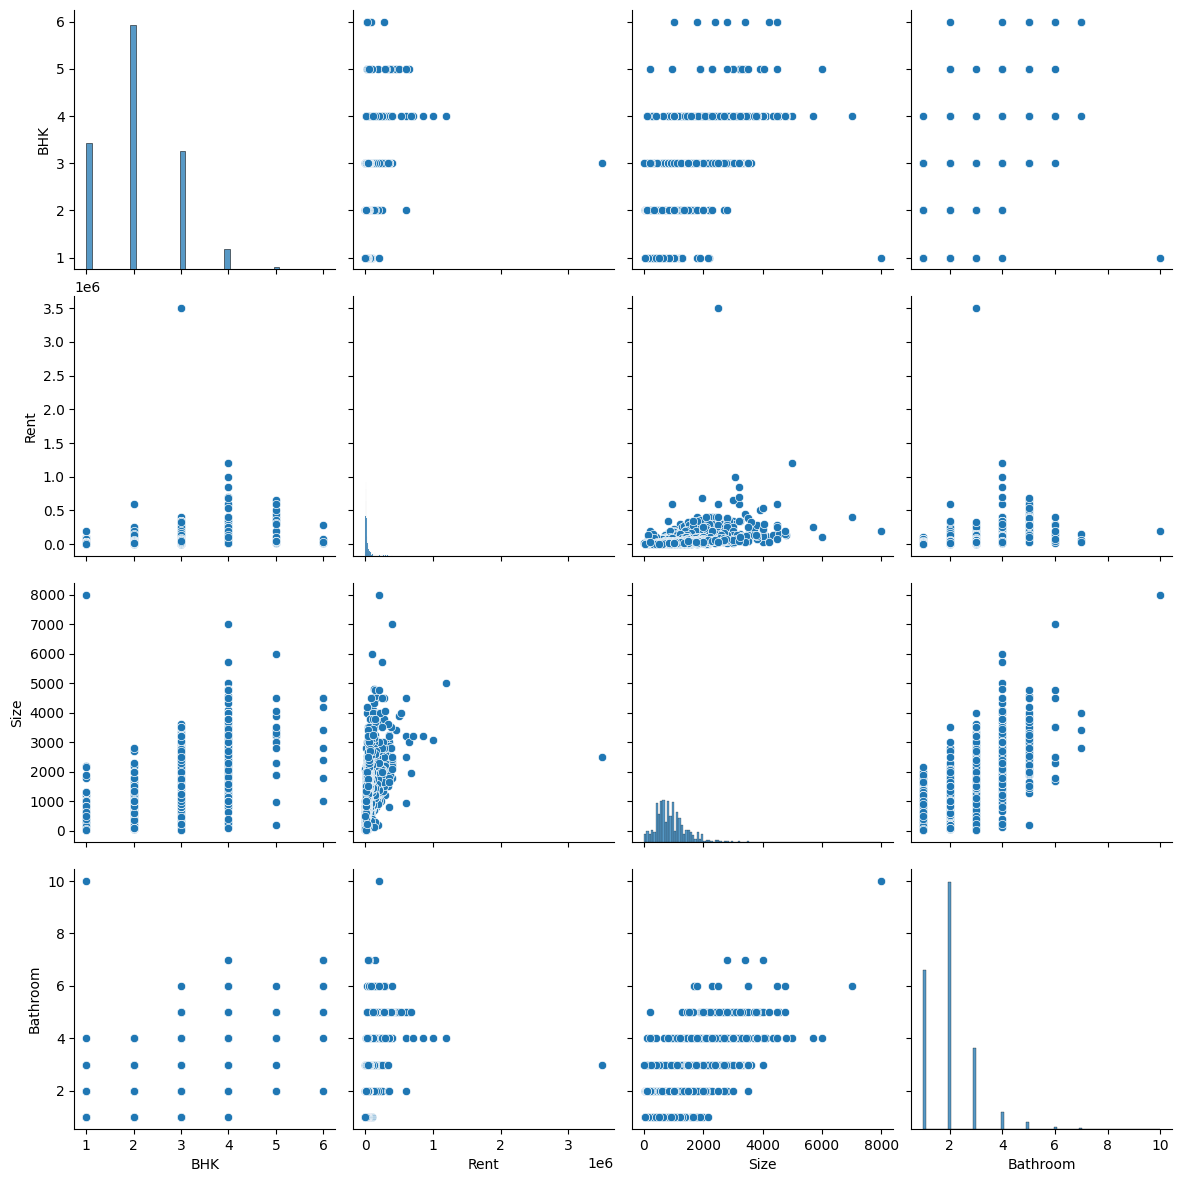

In [ ]:
sns.pairplot(rent_data,height = 3)
plt.show

# Univariate Analysis

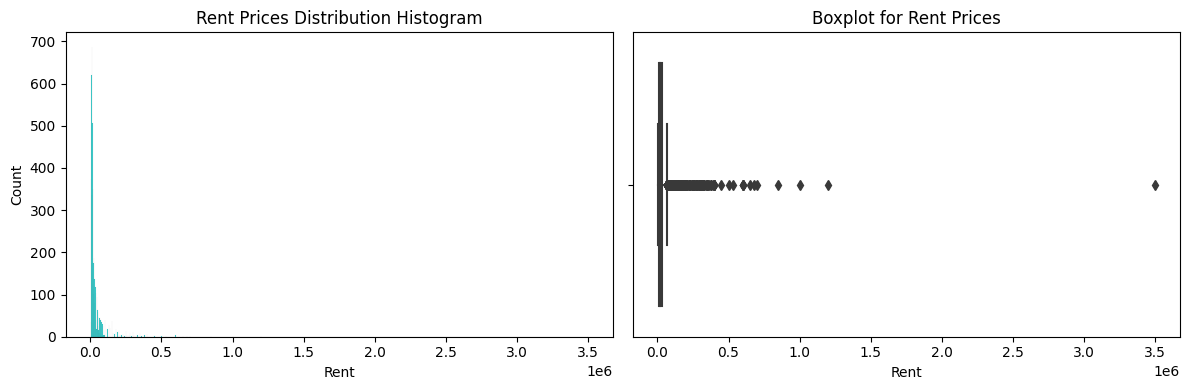

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
sns.histplot(rent_data['Rent'], color='c', ax=axes[0])
axes[0].set_title("Rent Prices Distribution Histogram")
axes[0].set_xlabel("Rent")
axes[0].set_ylabel("Count")

# Boxplot
sns.boxplot(x=rent_data['Rent'], color='m', ax=axes[1])
axes[1].set_title("Boxplot for Rent Prices")
axes[1].set_xlabel("Rent")


plt.tight_layout()
plt.show()


#### Observations:
- There is one outlier so far out of the inter-quantile range.



### Checking the position of Outlier

In [ ]:
print(np.where(rent_data['Rent']>2000000))

(array([1837]),)


#### Observations:
- Outlier's position is at 1837th position in a dataframe.

### Deleting the Outlier

In [ ]:
index_to_drop = 1837
mask = rent_data.index != index_to_drop
rent_data = rent_data[mask]

In [ ]:
fig = px.histogram(rent_data,x='Rent',color_discrete_sequence = px.colors.qualitative.Set3, title="Rent Prices Distribution Histogram")
fig.show()
fig = px.box(rent_data, x="Rent", title='Boxplot for Rent Prices')
fig.show()

### According to BHK

In [ ]:
rent_data['BHK'].value_counts()

2    2265
1    1167
3    1097
4     189
5      19
6       8
Name: BHK, dtype: int64

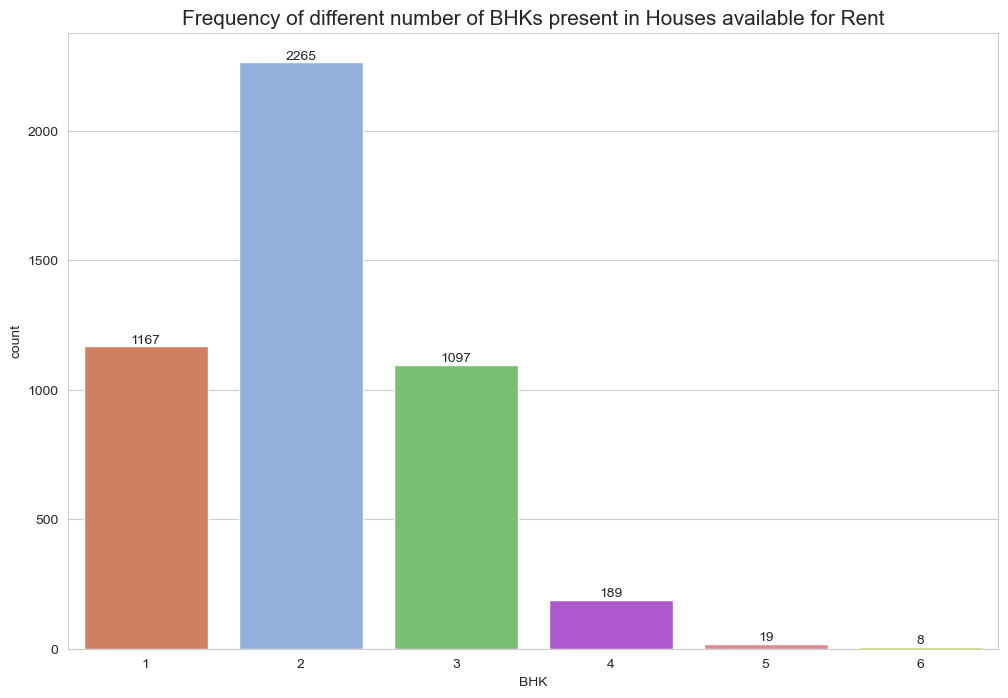

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='BHK',data=rent_data, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of different number of BHKs present in Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(rent_data, names='BHK', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for different number of BHKs present in Houses available for Rent')
fig.update_traces(textfont_size=15)
fig.show()

#### Observations:
- Mostly 2 BHK house are rented the most, as it is mostly under budget for the people and can be rented soon.
- 5 and 6 BHK house are put less for rent, because there is very less demand for such big spacious houses in India.

### According to Bathroom

In [ ]:
rent_data['Bathroom'].value_counts()

2     2291
1     1474
3      748
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64

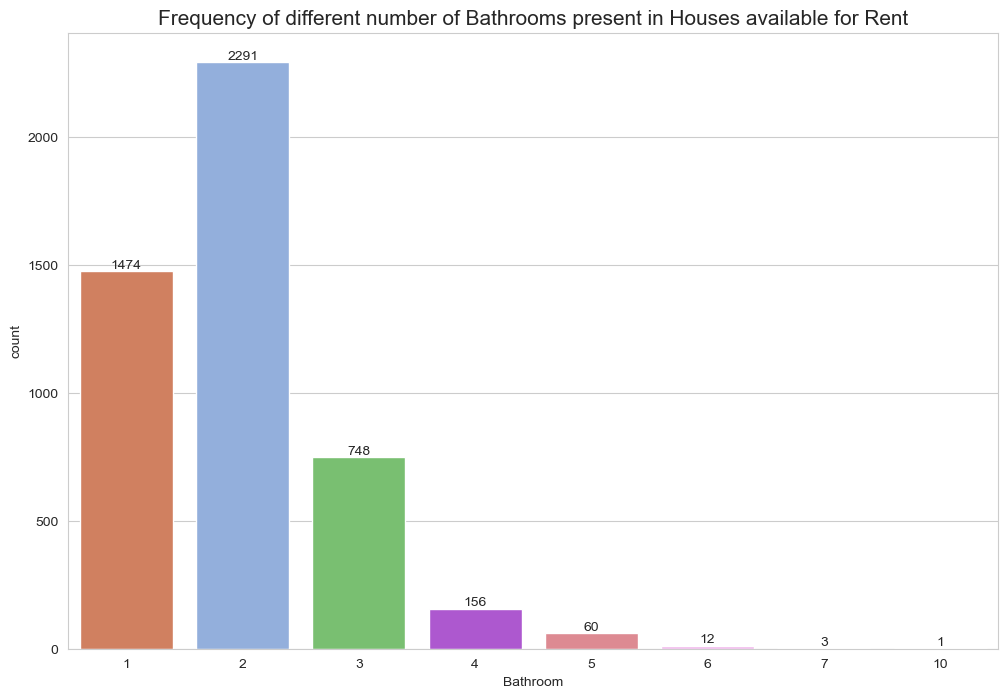

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509','#fab1f3','#86f7d7']

ax = sns.countplot(x='Bathroom',data=rent_data, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#fab1f3','#86f7d7','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of different number of Bathrooms present in Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(rent_data, names='Bathroom', height=700, width= 800, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for different number of Bathrooms present in Houses available for Rent')
fig.update_traces(textfont_size=15)
fig.show()

### Observations:
- House with 2 Bathrooms are most common for the houses put up on rent.
- Houses with 7 and 10 bathroom quite seems inappropriate and not much of use.

### According to City

In [ ]:
rent_data['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    885
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

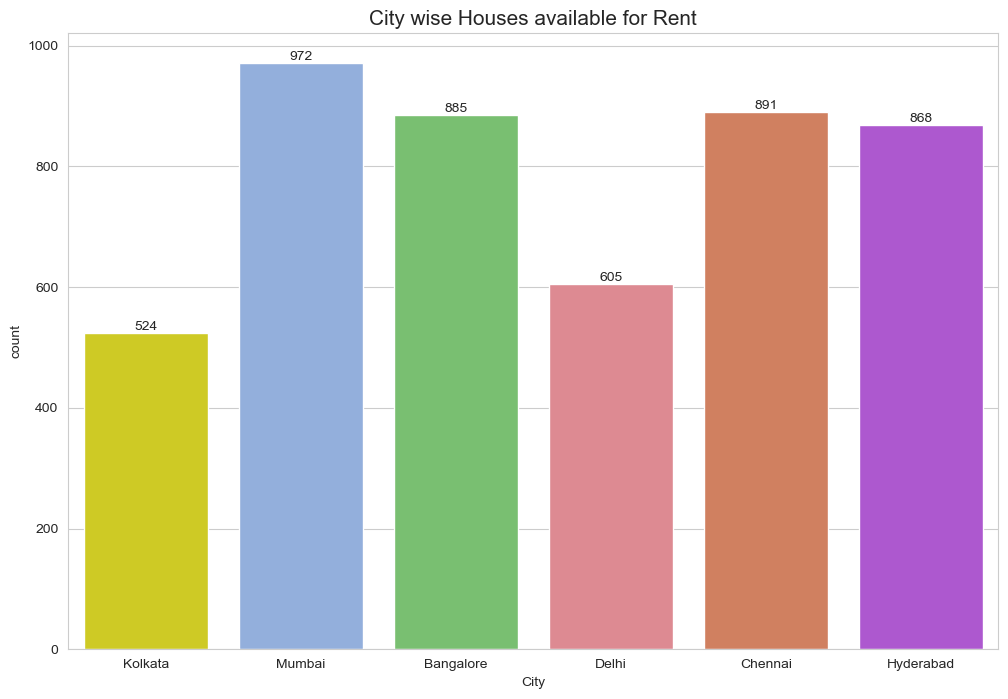

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='City',data=rent_data, palette=['#EAE509','#87ace8', '#6ecc64','#eb7c87','#e3784d','#b644e3'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('City wise Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(rent_data, names='City', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for Houses available for Rent in different cities')
fig.update_traces(textfont_size=15)
fig.show()

#### Observations:
- Mumbai has the highest number of rented houses, followed by Chennai and Hyderabad. This suggests a substantial demand, possibly driven by factors such as corporate opportunities and other influencing factors.





### According to Area Type

In [ ]:
rent_data['Area Type'].value_counts()

Super Area     2446
Carpet Area    2297
Built Area        2
Name: Area Type, dtype: int64

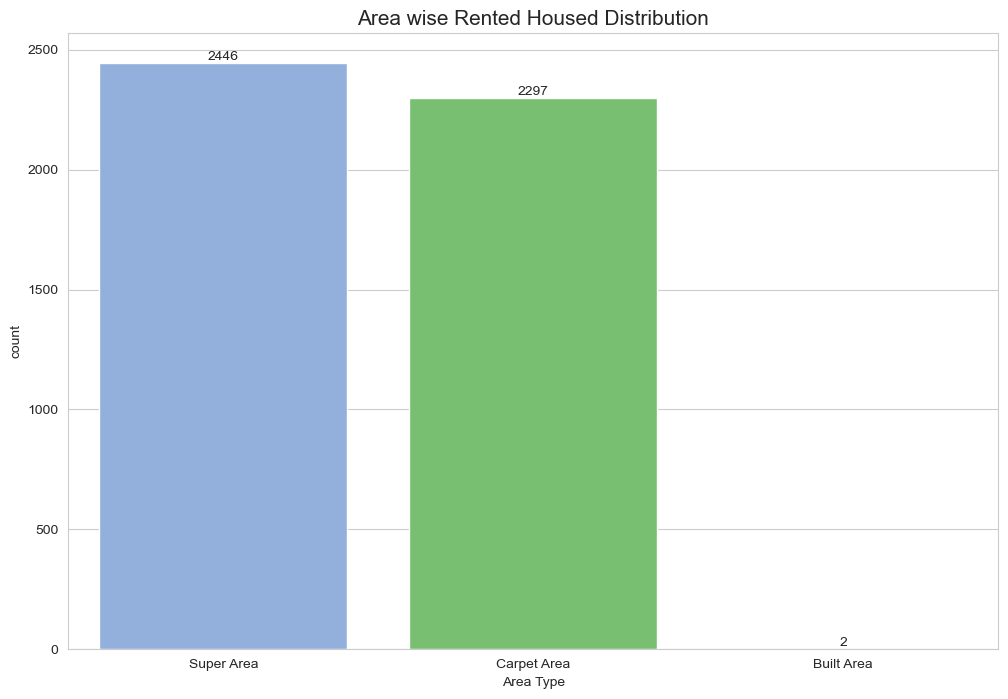

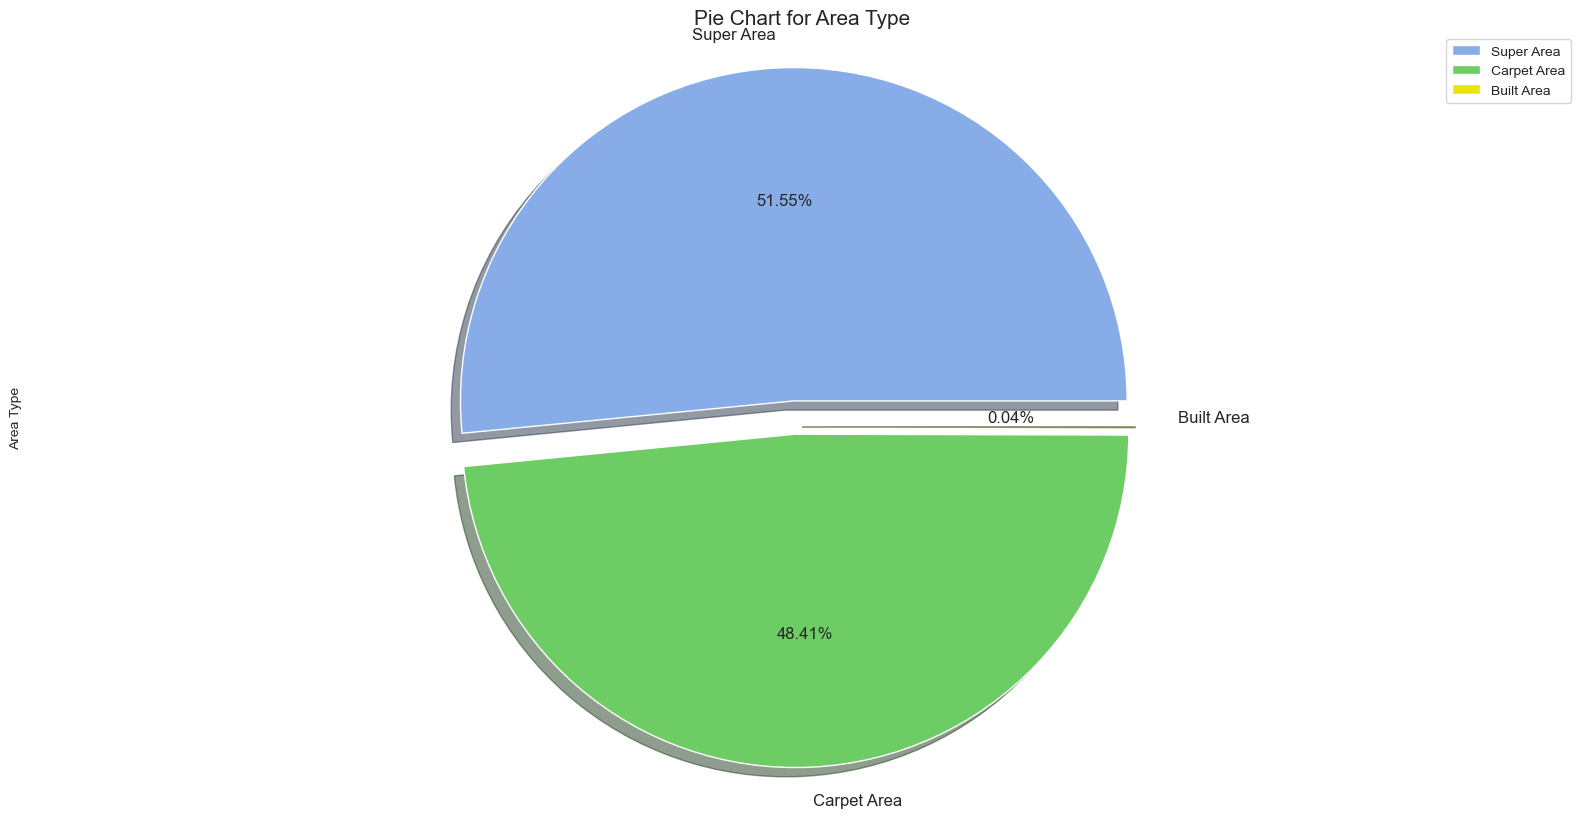

In [ ]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Area Type',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Area wise Rented Housed Distribution',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10))
rent_data['Area Type'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Area Type',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

#### Observations:
- Super area houses are more put up on rent.
- Built Area wise rented houses are very less.

### According to Furnishing Status

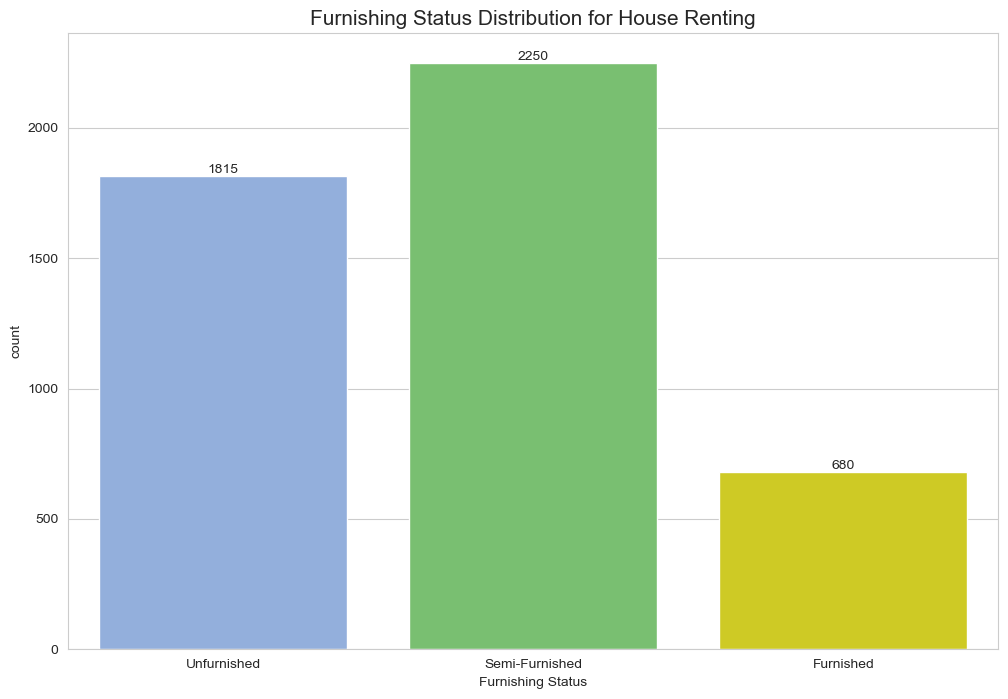

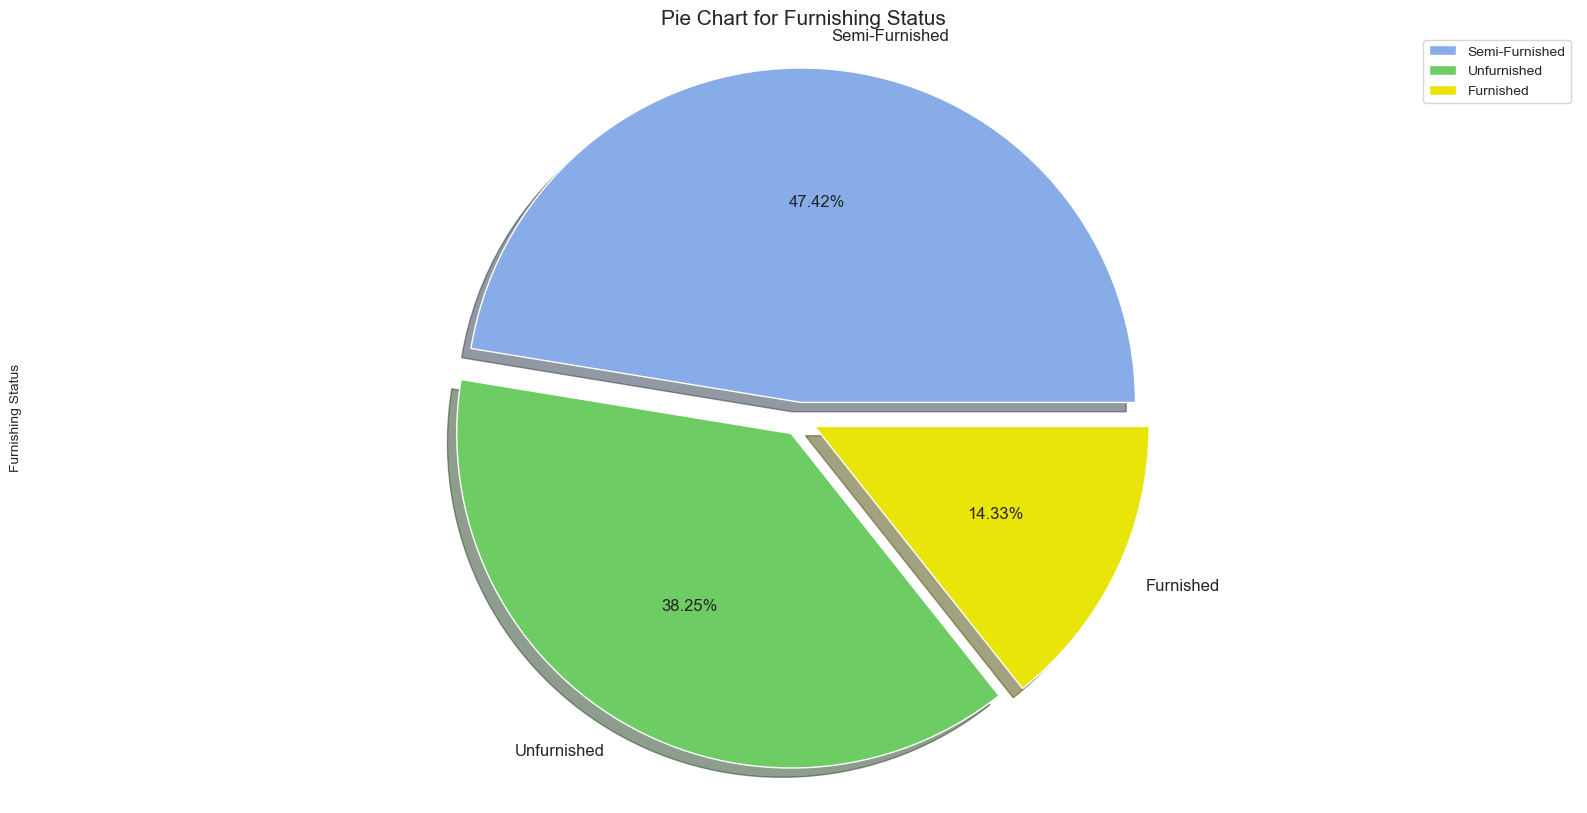

In [ ]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Furnishing Status',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Furnishing Status Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10))
rent_data['Furnishing Status'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Furnishing Status',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

#### Observations:
- Most Rented Houses are semi-furnished.
- Also cost wise these houses will be quite good to stay and pocket friendly.

### According to Preferred Tenant

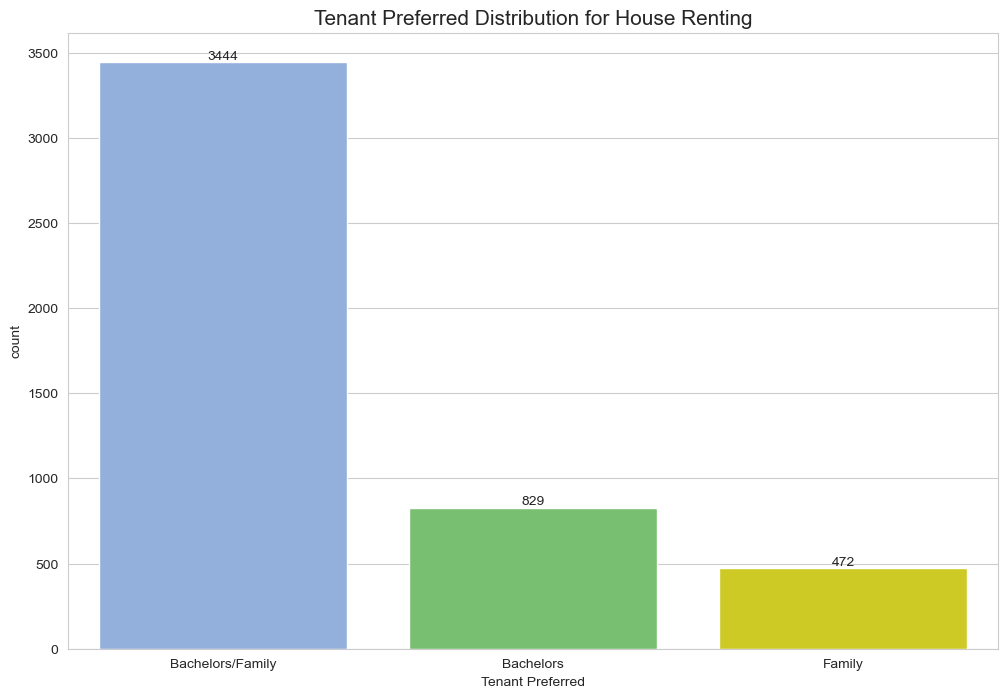

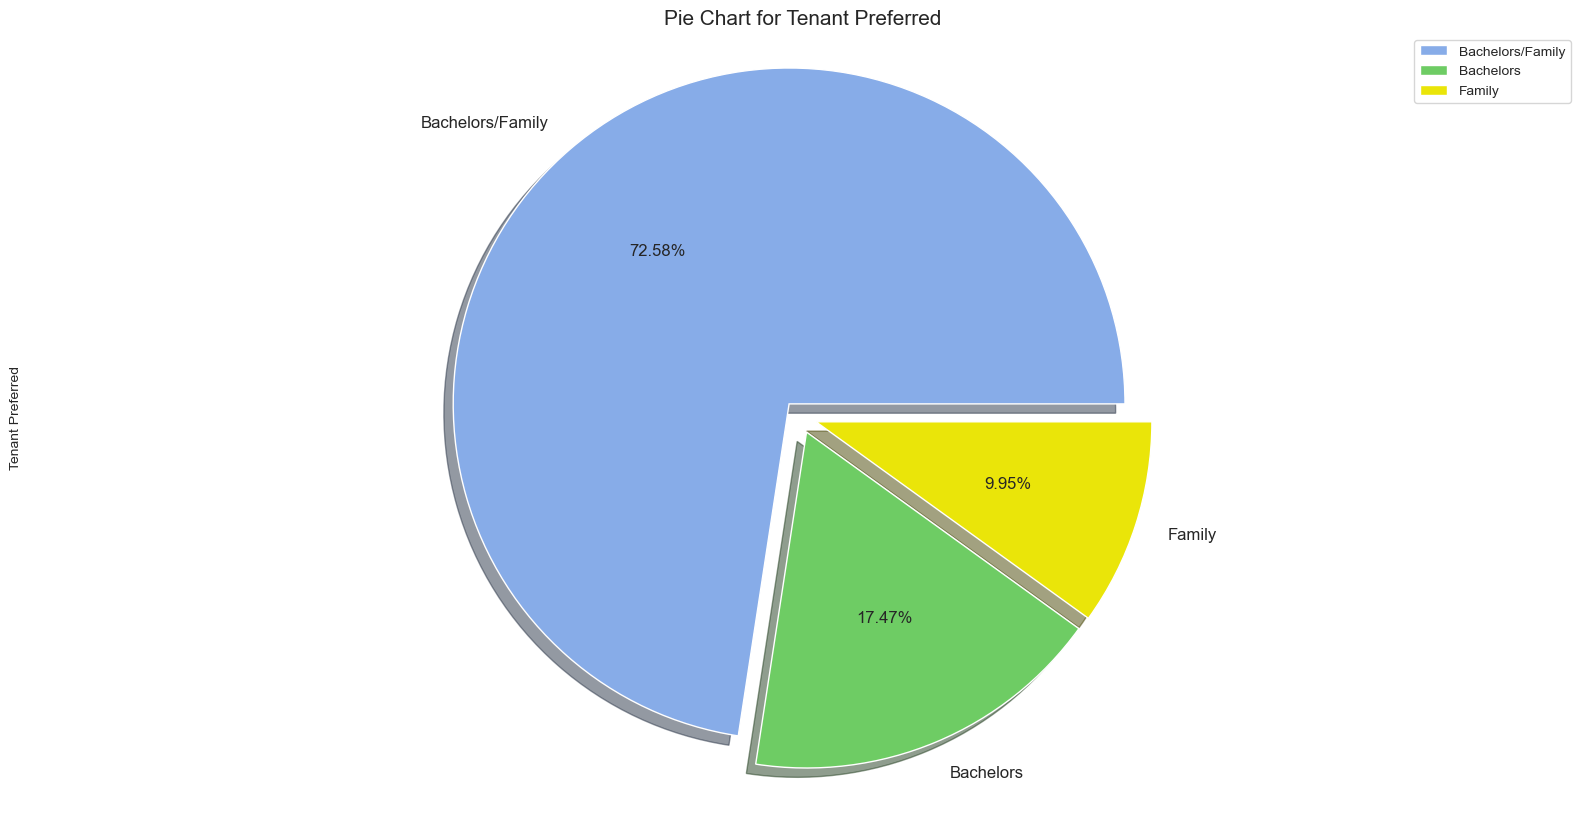

In [ ]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Tenant Preferred',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Tenant Preferred Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10))
rent_data['Tenant Preferred'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Tenant Preferred',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

#### Observations:
- It seems most rented houses have no special category. They are okay with both Bachelors and Family.

### According to Point Of Contact

In [ ]:
rent_data['Point of Contact'].value_counts()

Contact Owner      3216
Contact Agent      1528
Contact Builder       1
Name: Point of Contact, dtype: int64

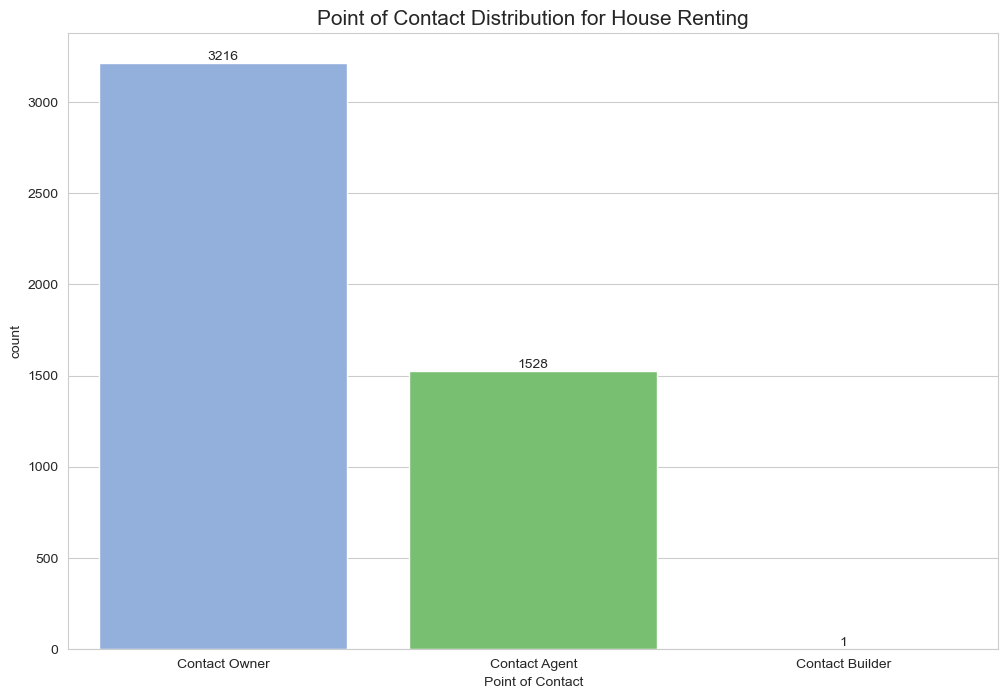

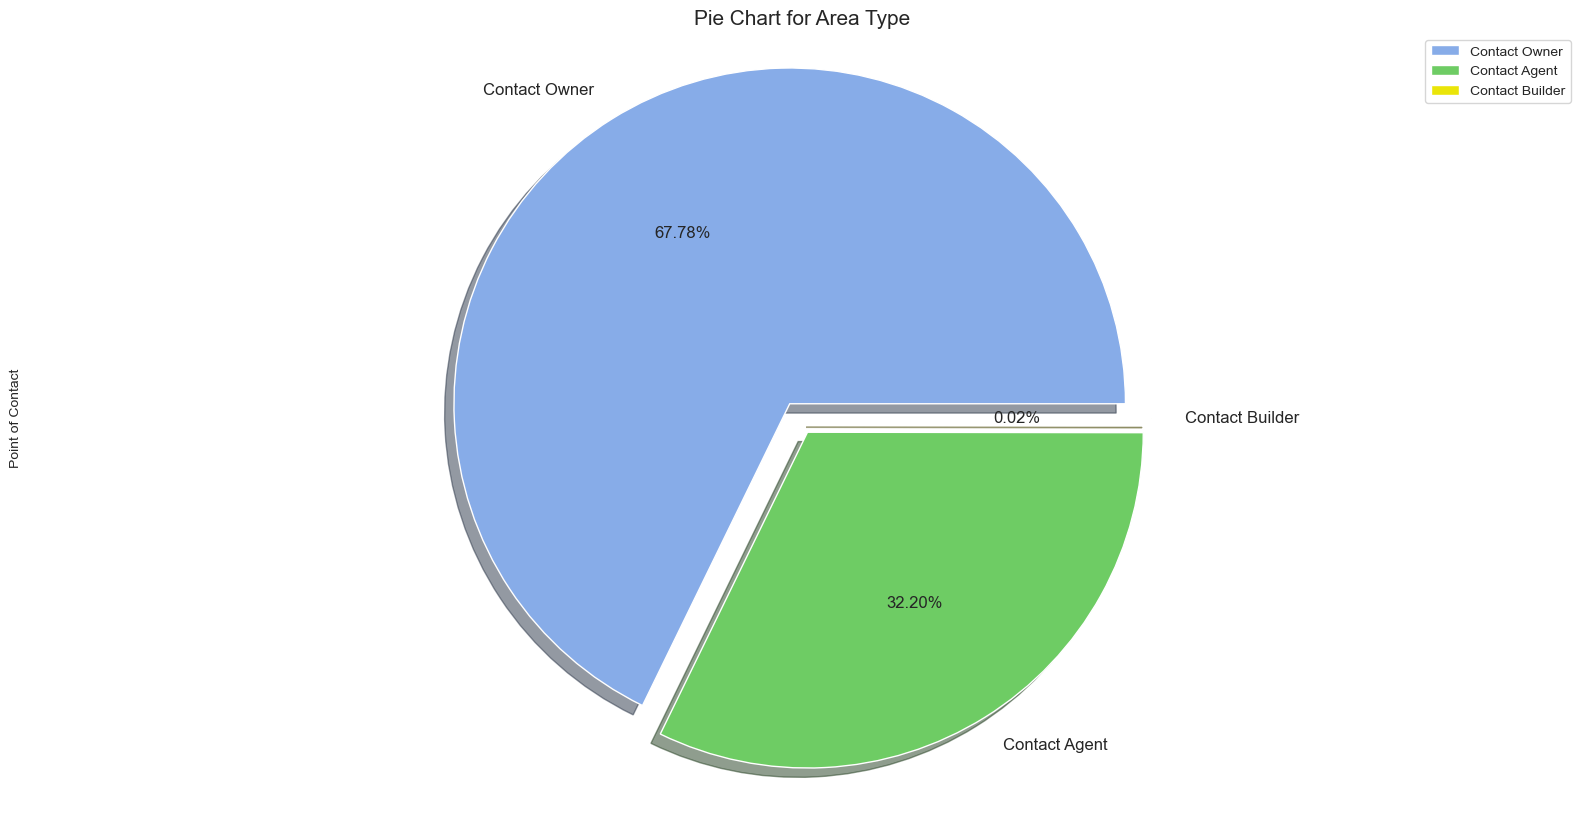

In [ ]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Point of Contact',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Point of Contact Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10))
rent_data['Point of Contact'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Area Type',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

#### Observations:
- Contact wise most have put the contact of owner only, as it directly more helps with negotiation and verification.

### According to Size


In [ ]:
fig = px.histogram(rent_data, x="Size", title='Size Distribution')
fig.show()
fig = px.box(rent_data, x="Size", title='Boxplot for Size')
fig.show()

#### Observations:
- The smallest rented property has a size of approximately 10 square feet.
- The largest rented property boasts a size of around 8000 square feet.
- The median property size for rented homes is approximately 850 square feet.




## Bivariate Analysis

### According to BHK and Rent distribution

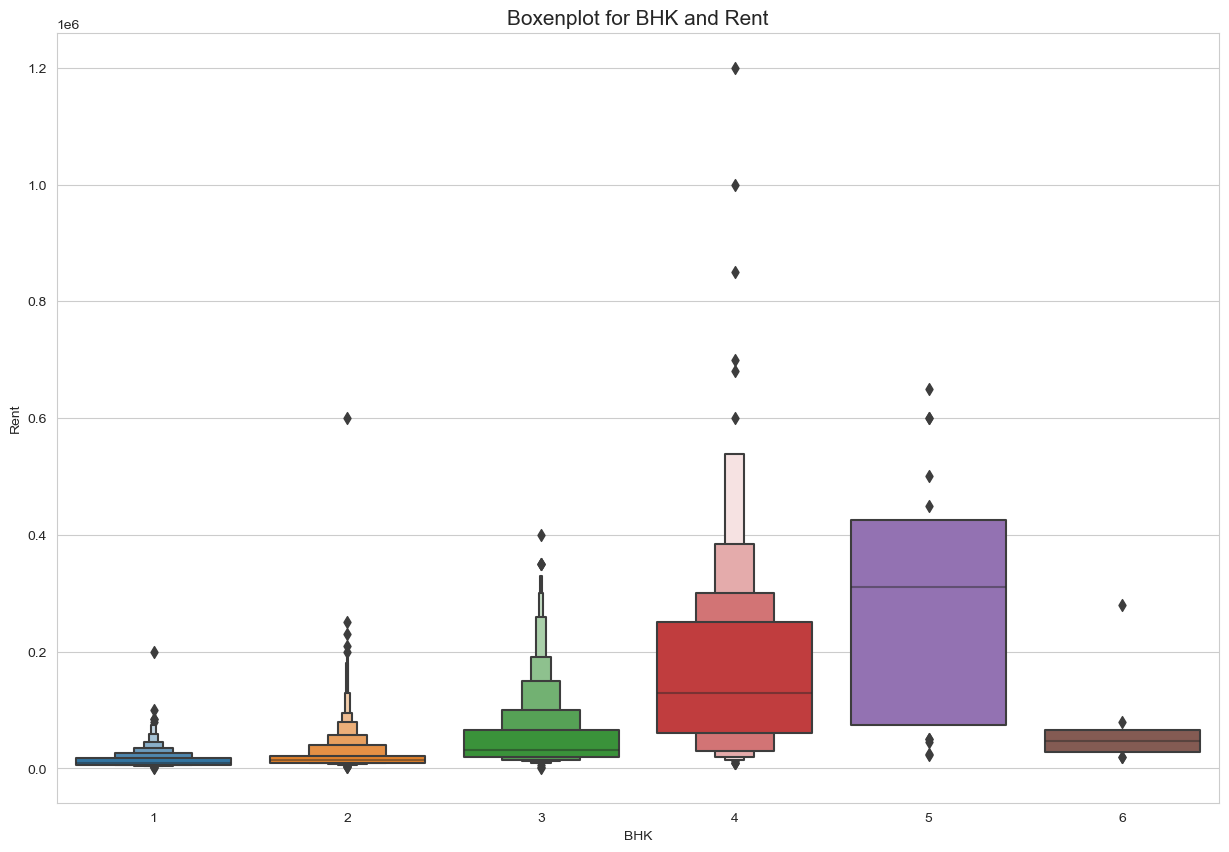

In [ ]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="BHK", y='Rent',data=rent_data)
plt.title('Boxenplot for BHK and Rent',fontsize=15)
plt.show()

### Observations:
- The rent of the houses is subsequently increasing with increase in BHK.
- For 6 BHK, things doesn't seem feasible and they are less in demand so rent is very less.

### According to Bathroom and Rent distribution

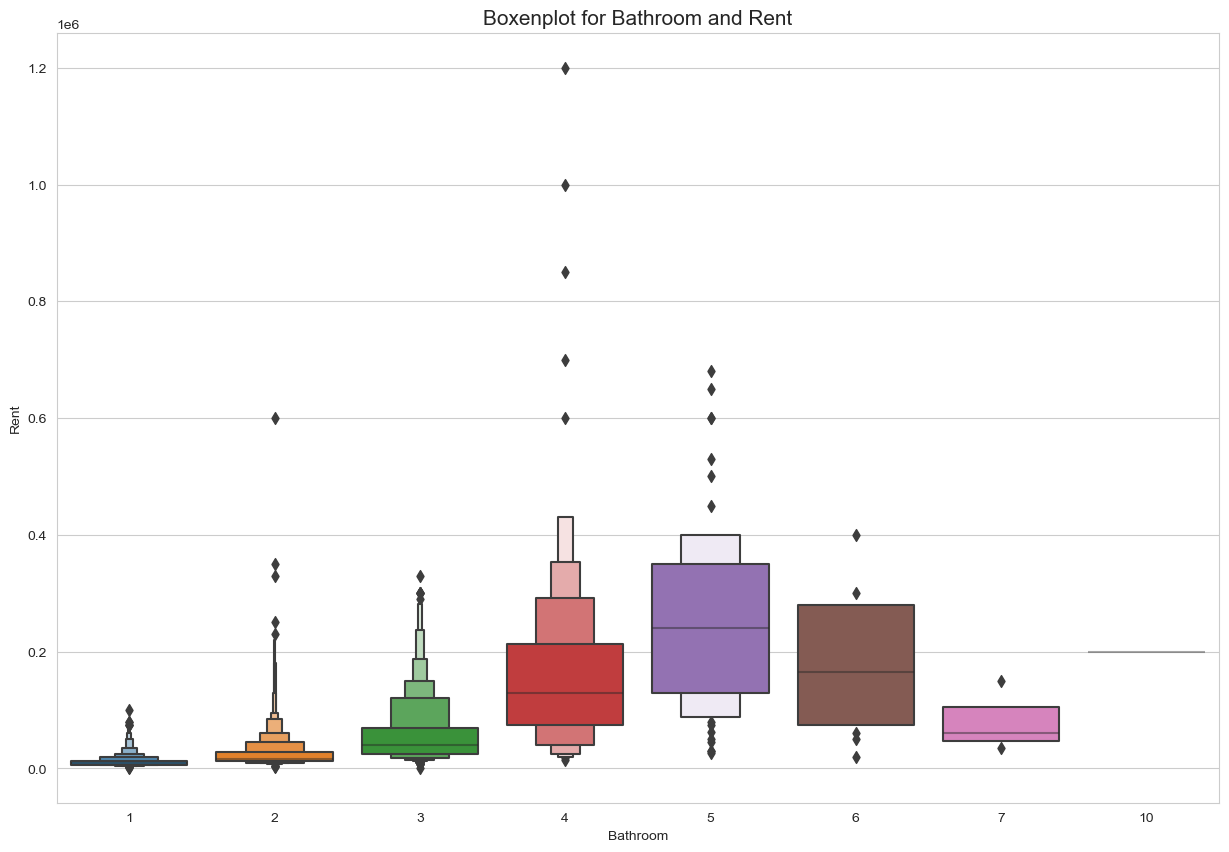

In [ ]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Bathroom", y='Rent',data=rent_data)
plt.title('Boxenplot for Bathroom and Rent',fontsize=15)
plt.show()

#### Observations:
- The House rent is increasing with increase in bathrooms in house.
- However, there appears to be limited demand for houses with more than 4-5 bathrooms, leading to lower rental rates for such properties.

### According to Area Type and Rent Distribution

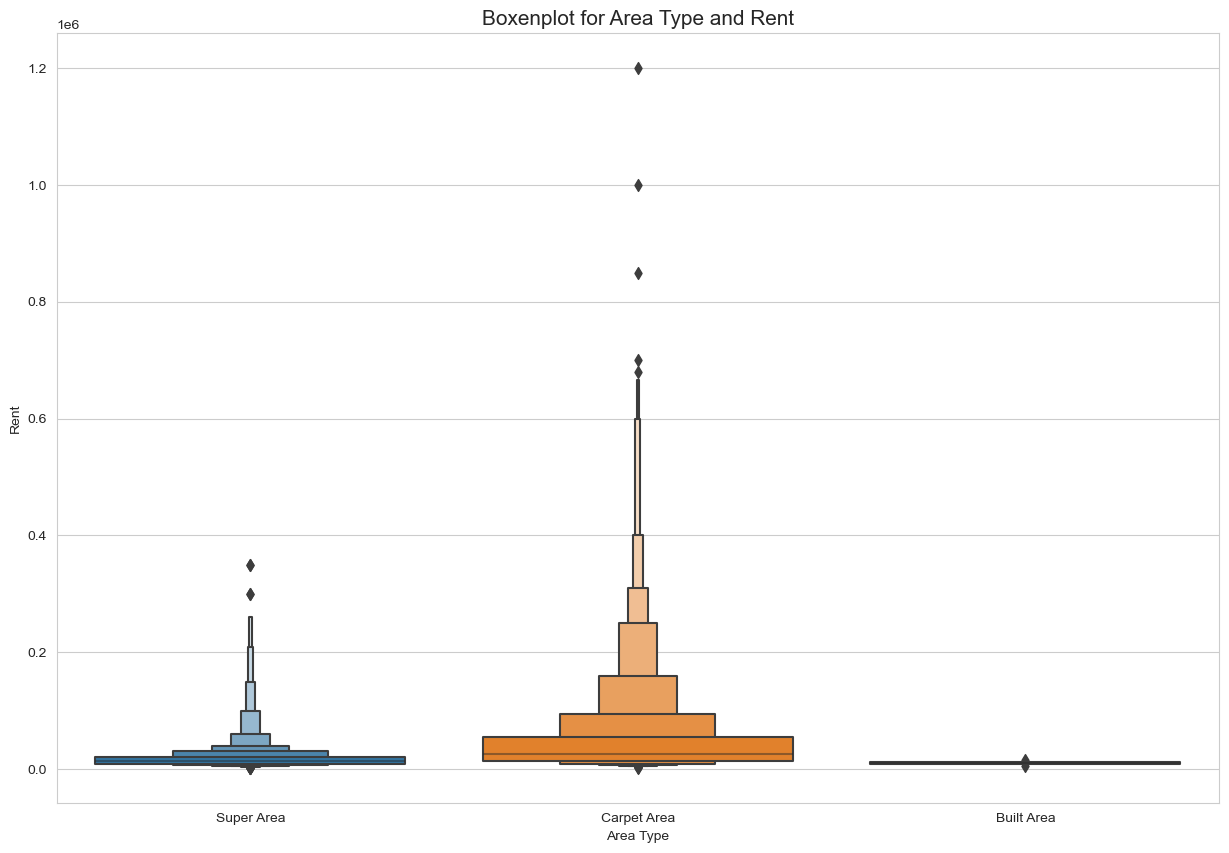

In [ ]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Area Type", y='Rent',data=rent_data)
plt.title('Boxenplot for Area Type and Rent',fontsize=15)
plt.show()

#### Observations:
- Houses with Carpet Area have more rent as compared to Super Area.
- Built Area are less in demand , so rent is kept less.

### According to City and Rent Distribution

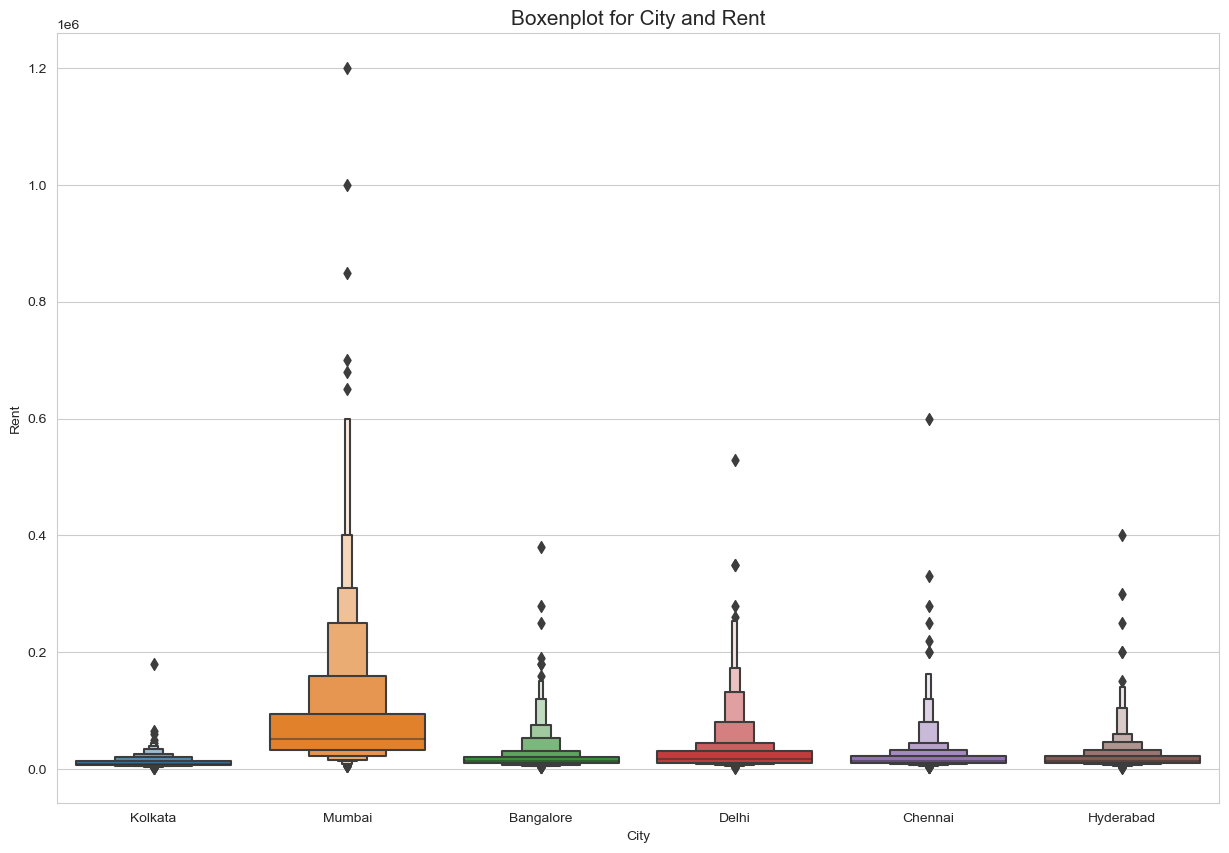

In [ ]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="City", y='Rent',data=rent_data)
plt.title('Boxenplot for City and Rent',fontsize=15)
plt.show()

#### Observations:
- Seems like Mumbai is having too much demand for houses, so rent is also very high. The immigrations of job corporates to Mumbai is high. This could be one of the reason of more demand in rented houses.
- All other cities except Kolkata are having fair equal amount of rent.
- Kolkata is not very much flourised in terms of job sectors and lifestyle as compared to other cities. Moreover it is also less developed compared to them. So demand is less there, so rent is also less.

### According to Furnishing Status and Rent Distribution

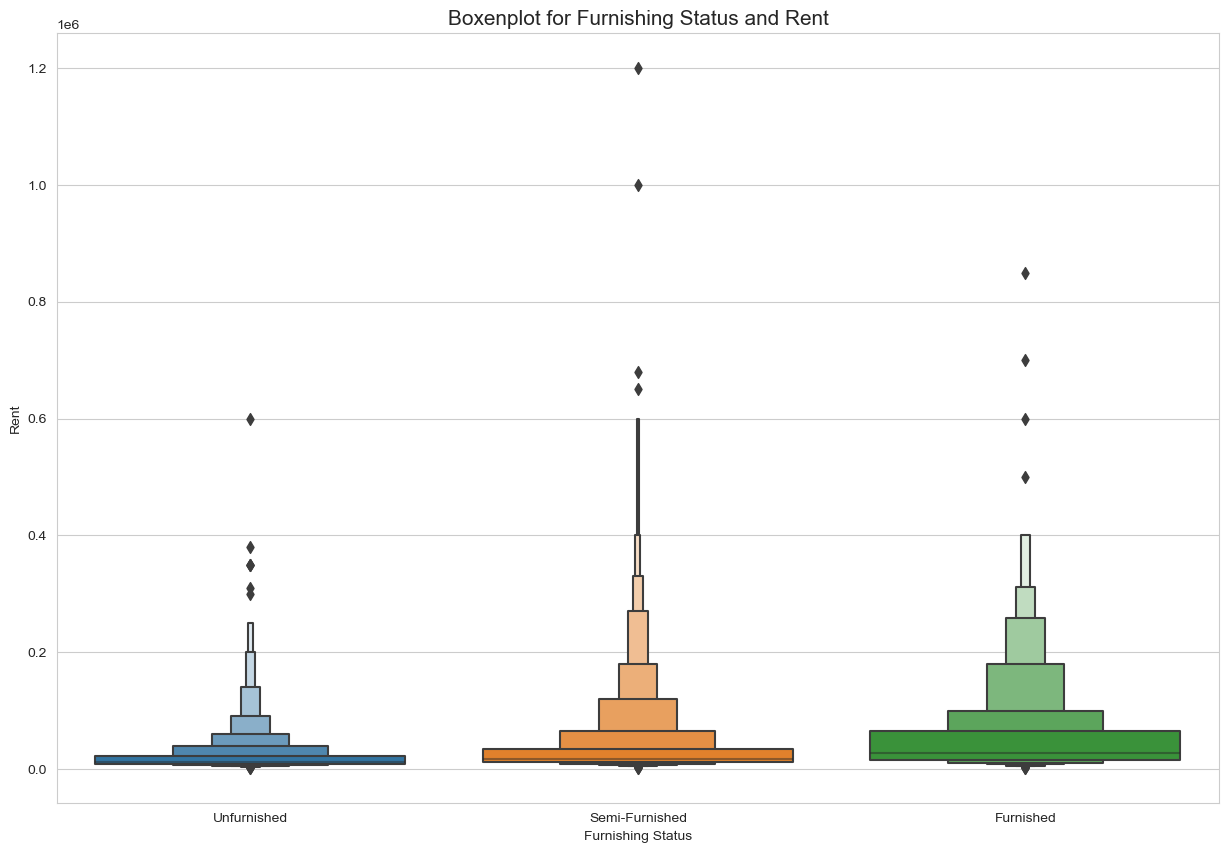

In [ ]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Furnishing Status", y='Rent',data=rent_data)
plt.title('Boxenplot for Furnishing Status and Rent',fontsize=15)
plt.show()

#### Observations:
- Unfurnished houses for rent are having less rent as compared to others.

### According to Tenant Preferred and Rent Distribution

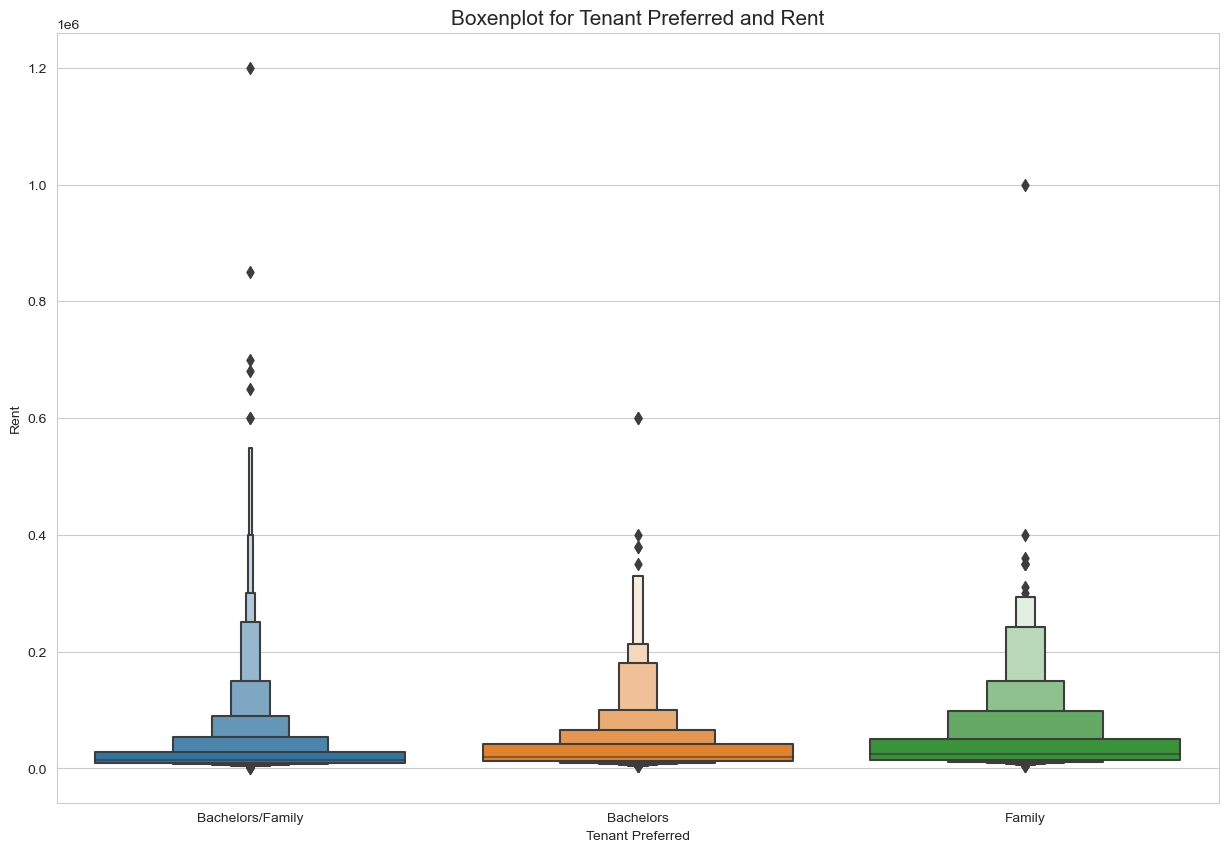

In [ ]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Tenant Preferred", y='Rent',data=rent_data)
plt.title('Boxenplot for Tenant Preferred and Rent',fontsize=15)
plt.show()

#### Observations:
- Houses rented with no tenant conditions are having a bit more rent as compared to others.

### According to Point of Contact and Rent Distribution

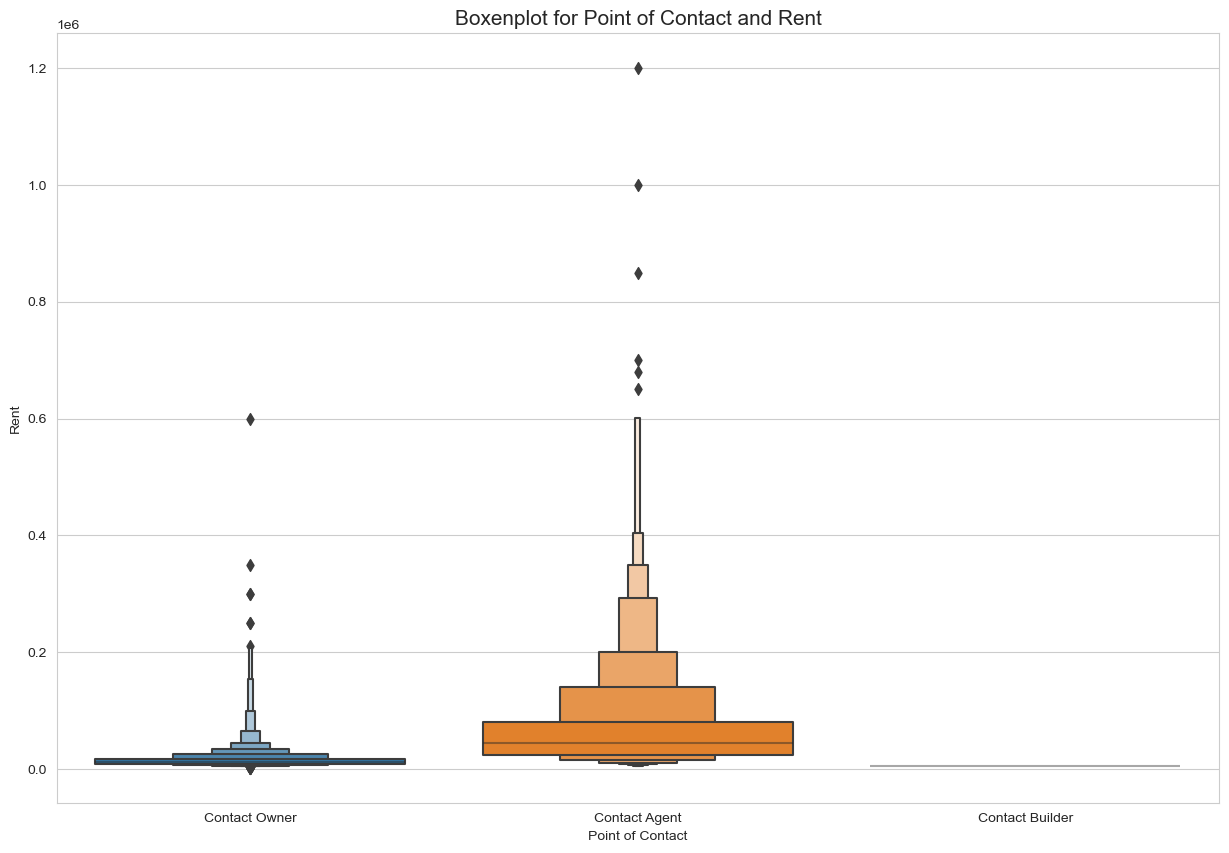

In [ ]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxenplot(x="Point of Contact", y='Rent',data=rent_data)
plt.title('Boxenplot for Point of Contact and Rent',fontsize=15)
plt.show()

#### Observations:
- As having a contact agent to get you a house rented also involves paying him/her. So this could be one of the reason that rent for Contact Agent pount of contact is bit high to compensate that.
- Directly contacting Builder involves less rent.

### Sunburst Chart

##### This sunburst chart offers a concise overview of flat allotment patterns, showcasing how different factors like city, area type, furnishing status, and tenant preferences influence housing allocations.

In [ ]:
import plotly.express as px
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
fig = px.sunburst(rent_data, path=['City', 'Area Type', 'Furnishing Status', 'Tenant Preferred'], width=900, height=900,
                  title='Allotment of flats according to Bachelors/Family/(Bachelors/Family)', color_discrete_sequence=custom_colors)
fig.show()


### Heatmap of Correlation

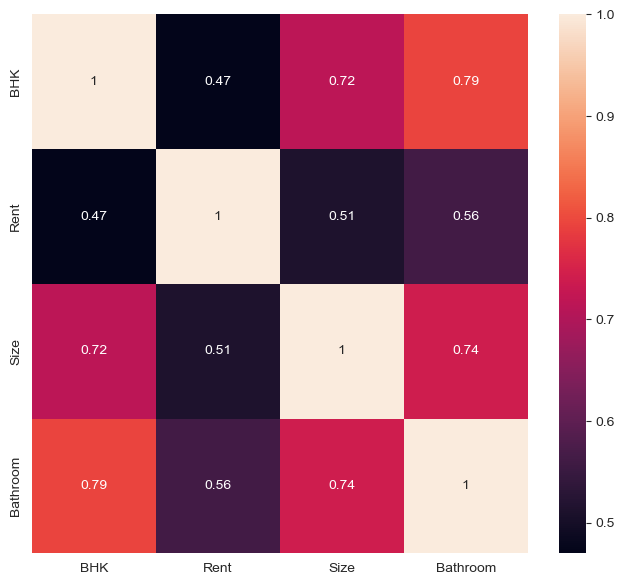

In [ ]:
corr = rent_data.corr()
plt.subplots(figsize=(8,7))
sns.heatmap(corr, vmax = 1,square = False,annot=True)
plt.show()

In [ ]:
rent_data = rent_data.drop(['Posted On','Area Locality','Floor'],axis=1)
rent_data.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
rent_data = pd.get_dummies(rent_data, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])
rent_data.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2,20000,800,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2,17000,1000,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2,10000,800,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2,7500,850,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


# Modeling

In [ ]:
X = rent_data.drop('Rent',axis=1)
y = rent_data['Rent']

## Splitting into Train and Test dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

## Scaling the data

In [ ]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [ ]:
print(X_train,y_train)

[[-1.29973557 -0.41868795 -1.09947045 ... -0.68565262 -0.01735525
   0.68612724]
 [-0.10471292 -0.41868795 -1.09947045 ... -0.68565262 -0.01735525
   0.68612724]
 [-0.10471292  0.36670492  0.04443349 ... -0.68565262 -0.01735525
   0.68612724]
 ...
 [-0.10471292 -0.18307009  0.04443349 ... -0.68565262 -0.01735525
   0.68612724]
 [-1.29973557 -0.96846295 -1.09947045 ... -0.68565262 -0.01735525
   0.68612724]
 [-1.29973557 -0.81138438  0.04443349 ...  1.45846448 -0.01735525
  -1.45745561]] [[-0.42245895]
 [-0.39738427]
 [-0.3388767 ]
 ...
 [-0.1717122 ]
 [-0.4726083 ]
 [-0.15499575]]


## Linear Regression


In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)
mse_lm =  metrics.mean_squared_error(y_test, lm_prediction)
rmse_lm =  np.sqrt(mse_lm)

print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)

MAE: 41460628343.95622
MSE: 9.389716209269351e+21
RMSE: 96900548033.89581


## Decision Tree


In [ ]:
dt = DecisionTreeRegressor(random_state = 100)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

mae_dt = metrics.mean_absolute_error(y_test, dt_prediction)
mse_dt =  metrics.mean_squared_error(y_test, dt_prediction)
rmse_dt =  np.sqrt(mse_dt)

print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)

MAE: 0.25767891524169967
MSE: 0.4224998679675354
RMSE: 0.6499998984365578


## Random Forest


In [ ]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

mae_rf = metrics.mean_absolute_error(y_test, rf_prediction)
mse_rf =  metrics.mean_squared_error(y_test, rf_prediction)
rmse_rf =  np.sqrt(mse_rf)

print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)

MAE: 0.20970153530959743
MSE: 0.31989031544744245
RMSE: 0.5655884682765752


# Model Comparision

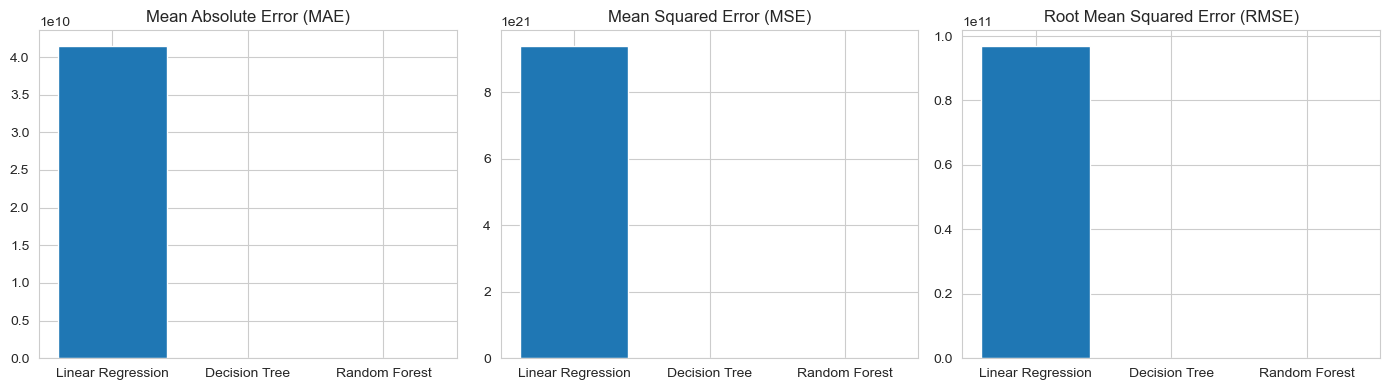

In [ ]:
import matplotlib.pyplot as plt


models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae = [41460628343.95622, 0.25767891524169967, 0.2111168098445657]
mse = [9.389716209269351e+21, 0.4224998679675354, 0.31675590497560185]
rmse = [96900548033.89581, 0.6499998984365578, 0.5628107186040453]

plt.figure(figsize=(14, 4))
plt.subplot(131)
plt.bar(models, mae)
plt.title('Mean Absolute Error (MAE)')

plt.subplot(132)
plt.bar(models, mse)
plt.title('Mean Squared Error (MSE)')

plt.subplot(133)
plt.bar(models, rmse)
plt.title('Root Mean Squared Error (RMSE)')

plt.tight_layout()
plt.show()




We conducted regression analysis using three different models: Linear Regression, Decision Tree Regression, and Random Forest Regression. Here are the key insights from our model comparison:

- **Linear Regression**: This model resulted in a high Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), with values of 41,460,628,343.96, 9.39e+21, and 96,900,548,033.90, respectively. These metrics indicate that Linear Regression performed poorly in predicting rent prices.

- **Decision Tree Regression**: The Decision Tree model outperformed Linear Regression with a substantially lower MAE of approximately 0.26, an MSE of around 0.42, and an RMSE of about 0.65. While it provides more accurate predictions than Linear Regression, there is room for further improvement.

- **Random Forest Regression**: Among the models, Random Forest Regression performed the best with the lowest MAE of approximately 0.21, an MSE of about 0.32, and an RMSE of approximately 0.56. This model demonstrated the highest accuracy in predicting rent prices and is the most suitable for our specific problem.

# Feature Importance

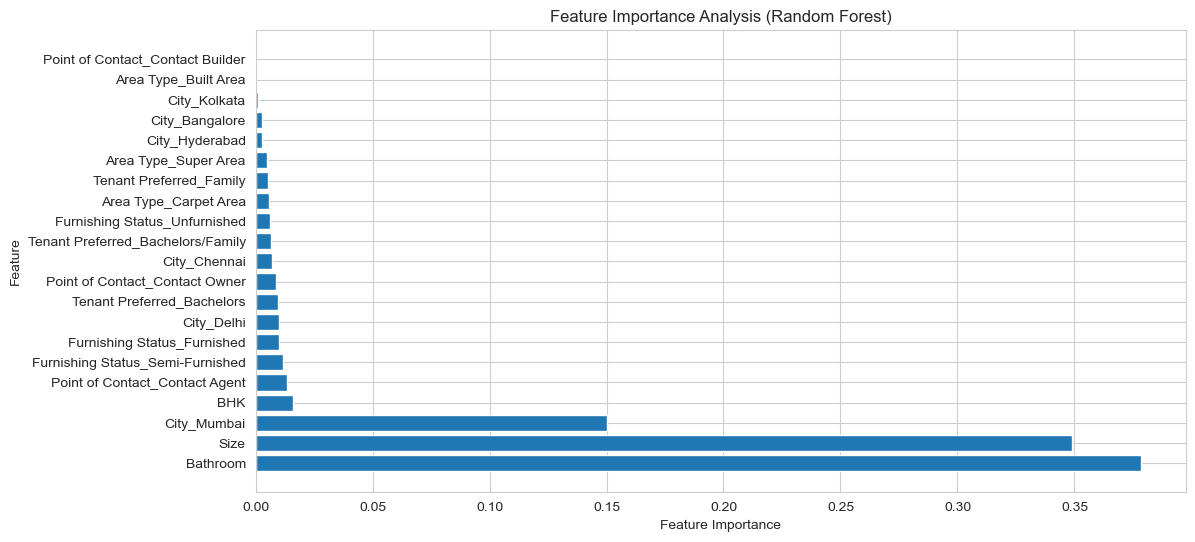

In [ ]:


# Define the features (X) and the target variable (y)
X = rent_data.drop(columns=['Rent'])
y = rent_data['Rent']

# Create and train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=100)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis (Random Forest)')
plt.show()


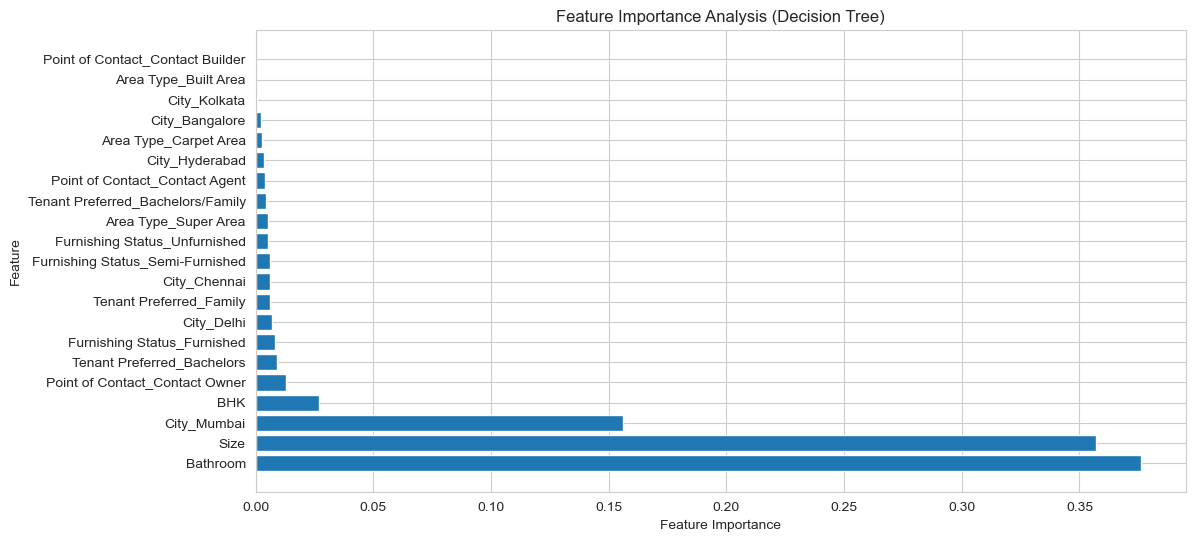

In [ ]:


# Define the features (X) and the target variable (y)
X = rent_data.drop(columns=['Rent'])
y = rent_data['Rent']

# Create and train a Decision Tree model
dt = DecisionTreeRegressor(random_state=100)
dt.fit(X, y)

# Get feature importances
feature_importances = dt.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis (Decision Tree)')
plt.show()


In [ ]:
# Define the features (X) and the target variable (y)
X = rent_data.drop(columns=['Rent'])
y = rent_data['Rent']

# Create and train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=100)
rf.fit(X, y)

# Get feature importances as percentages for Random Forest
total_importance_rf = sum(rf.feature_importances_)
feature_importances_rf_percentage = [(importance / total_importance_rf) * 100 for importance in rf.feature_importances_]

# Create a DataFrame to store feature names and their importances as percentages for Random Forest
feature_importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance (%)': feature_importances_rf_percentage})

# Sort the features by importance in descending order for Random Forest
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance (%)', ascending=False)

# Print feature importances for Random Forest
print("Feature Importance Analysis (Random Forest)")
print(feature_importance_df_rf)

# Create and train a Decision Tree model
dt = DecisionTreeRegressor(random_state=100)
dt.fit(X, y)

# Get feature importances as percentages for Decision Tree
total_importance_dt = sum(dt.feature_importances_)
feature_importances_dt_percentage = [(importance / total_importance_dt) * 100 for importance in dt.feature_importances_]

# Create a DataFrame to store feature names and their importances as percentages for Decision Tree
feature_importance_df_dt = pd.DataFrame({'Feature': X.columns, 'Importance (%)': feature_importances_dt_percentage})

# Sort the features by importance in descending order for Decision Tree
feature_importance_df_dt = feature_importance_df_dt.sort_values(by='Importance (%)', ascending=False)

# Print feature importances for Decision Tree
print("\nFeature Importance Analysis (Decision Tree)")
print(feature_importance_df_dt)


Feature Importance Analysis (Random Forest)
                              Feature  Importance (%)
2                            Bathroom       37.853500
1                                Size       34.887063
11                        City_Mumbai       15.031167
0                                 BHK        1.593953
18     Point of Contact_Contact Agent        1.338508
13   Furnishing Status_Semi-Furnished        1.162634
12        Furnishing Status_Furnished        1.008962
8                          City_Delhi        1.007420
15         Tenant Preferred_Bachelors        0.981131
20     Point of Contact_Contact Owner        0.853929
7                        City_Chennai        0.712473
16  Tenant Preferred_Bachelors/Family        0.664495
14      Furnishing Status_Unfurnished        0.638516
4               Area Type_Carpet Area        0.564063
17            Tenant Preferred_Family        0.515839
5                Area Type_Super Area        0.509737
9                      City_Hyderabad 

# Key Insights And Conclusion:

#### Property Size and Configuration:
The number of bathrooms and the size of the property are the most crucial factors influencing rent prices. Property owners and renters should pay close attention to these features when setting or evaluating rent rates.

#### City of Mumbai:
Mumbai stands out as a city with significantly higher rent prices. This suggests a higher demand for rental properties in Mumbai and a potential premium on rental rates in this city.

#### Point of Contact:
The choice of whom to contact for property inquiries, such as "Contact Agent" and "Contact Owner," also influences rent prices. Property owners and agents should consider the impact of communication methods.

#### Number of Bedrooms (BHK):
The property's layout and the number of bedrooms, halls, and kitchens (BHK) have a substantial impact, particularly in the Decision Tree model. This underscores the importance of property size and configuration in setting rent prices.

#### Other Factors:
Tenant preferences, furnishing status, and area types have a relatively lower impact on rent prices. While they still play a role, their influence is not as pronounced as property size and location.

